In [1]:
from fastbook import *
from fastai.imports import *
from fastdownload import *
from fastai.vision.all import *
from fastai.vision.widgets import *
%matplotlib inline

'''
1 - train a model before you clean 
'''


'\n1 - train a model before you clean \n'

In [8]:
results = search_images_ddg('grizly bear' , max_images=1)
img_path = download_url(results[0] , dest='Grizzly.jpg')
img = Image.open(img_path)

In [15]:
path = Path('train_data2')

searches=['grizzly bear' , 'black bear' , 'teady bear']

if not path.exists:
    path.mkdir()
    
for item in searches:
    dest = (path/item)
    dest.mkdir(exist_ok=True)
    search_results = search_images_ddg(item)
    download_images(dest , urls=search_results)

In [17]:
failed = verify_images(get_image_files('train_data2/'))
failed.map(Path.unlink);

In [2]:
path = Path('train_data2')
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=[RandomResizedCrop(224, min_scale=0.5)],
    batch_tfms=aug_transforms()
).dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [3]:
model = vision_learner(dls , resnet18 , metrics = accuracy)
model.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,1.967739,0.252666,0.900901,00:49


epoch,train_loss,valid_loss,accuracy,time
0,0.266951,0.084673,0.981982,00:56
1,0.171198,0.052095,0.981982,00:52


In [4]:
interpreter = ClassificationInterpretation.from_learner(model)

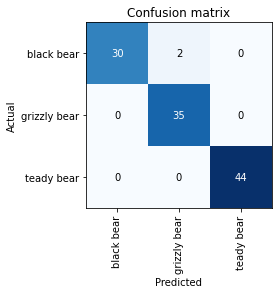

In [5]:
interpreter.plot_confusion_matrix()

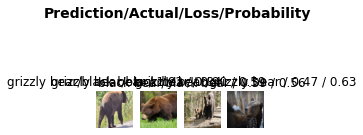

In [6]:
interpreter.plot_top_losses(4 , nrows = 1 , figsize = (3 , 3))

In [9]:
cleaner = ImageClassifierCleaner(model)
cleaner

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\JupyterNotebook\\fastai\\train_data2\\teady bear\\5f8a9c96-1d70-440f-8732-142db3489782.jpg'

In [8]:
for idx in cleaner.delete():
    cleaner.fns[idx].unlink()
for idx , cat in cleaner.change():
    shutil.move(str(cleaner.fns[idx]) , path/cat)

In [10]:
model.export('bears_model.pkl')

In [2]:
#take a model that you trained to make predictions
learn = load_learner('bearsfastai/bears_model.pkl')

In [12]:
categories = ( 'black bear','grizzly bear'  , 'teady bear')
def classify_img(img):
    pred , idx , probs = learn.predict(img)
    return dict(zip(categories , map(float , probs)))

In [13]:
import gradio as gr
image = gr.inputs.Image(shape=(194,194))
label = gr.outputs.Label()
examples = [
    'train_data2/teady bear/f8d8000c-1eae-43dc-a06b-58e9e242effd.jpg' , 
    'train_data2/grizzly bear/1d5e3d53-a4a9-4f19-b1cb-1bed0f95ed66.jpg',
    'train_data2/black bear/6ea1843c-f6d4-497d-a861-d66ae6b36290.jpg'
]

c:\Users\antoz\anaconda3\lib\site-packages\gradio\inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\Users\antoz\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
c:\Users\antoz\anaconda3\lib\site-packages\gradio\outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
c:\Users\antoz\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [14]:
intf = gr.Interface(fn = classify_img , inputs = image , outputs = label , examples = examples)
intf.launch(share = True)

Running on local URL:  http://127.0.0.1:7863/
Running on public URL: https://23625.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x18582c10c40>,
 'http://127.0.0.1:7863/',
 'https://23625.gradio.app')